In [1]:
!pip install scanpy
!pip install KDEpy
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 112.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 136.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 133.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 136.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 185.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 117.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 134.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 160.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 120.7 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 8.7 MB/s eta 0:00:00a 0:00:01


# Analysis of clusters in untreated Klebsiella data (only 2 clusters)

In [2]:
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sps
from scipy.stats import ranksums, spearmanr, kendalltau

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tools.util_probe as up
import tools.util as ut
import tools.NB_est as nb
import tools.countsplit as cs
import tools.ClusterDE as cd

import importlib

## Preprocessing
### Read data

In [3]:
data_path = "../../data/BacDrop"
data_gene = sc.read_h5ad(data_path + "/untreated_data_processed.h5ad")
data_gene

AnnData object with n_obs × n_vars = 48511 × 2500
    obs: 'treatment', 'replicate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'outlier', 'n_genes', 'total_counts_norm', 'total_counts_scale', 'embedding_reliability', 'reliability_score', 'null_reliability_score', 'leiden_opt'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'var_counts', 'is_scd_outlier', 'nb_overdisp', 'nb_overdisp_cutoff', 'nb_mean', 'nb_umi', 'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct', 'mean', 'std', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'lt', 'locus_tag', 'product_accession', 'name', 'symbol'
    uns: 'BacSC_params', 'embedding_reliability_colors', 'hvg', 'leiden_opt', 'leiden_opt_colors', 'neighbors', 'pca', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'vst_counts'
 

In [4]:
data_gene_01 = data_gene[data_gene.obs["leiden_opt"].isin(("0", "2"))]
sc.pp.filter_genes(data_gene_01, min_cells=2)
data_gene_01

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:275: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


AnnData object with n_obs × n_vars = 46317 × 2406
    obs: 'treatment', 'replicate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'outlier', 'n_genes', 'total_counts_norm', 'total_counts_scale', 'embedding_reliability', 'reliability_score', 'null_reliability_score', 'leiden_opt'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'var_counts', 'is_scd_outlier', 'nb_overdisp', 'nb_overdisp_cutoff', 'nb_mean', 'nb_umi', 'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct', 'mean', 'std', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'lt', 'locus_tag', 'product_accession', 'name', 'symbol'
    uns: 'BacSC_params', 'embedding_reliability_colors', 'hvg', 'leiden_opt', 'leiden_opt_colors', 'neighbors', 'pca', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'vst_counts'
 

In [ ]:
sc.pl.umap(data_gene_01, color="leiden_opt", palette="tab10", title="Klebsiella untreated (subset)")
plt.show()

## Generate synthetic null data for ClusterDE

### Estimate distribution and parameters for every gene

In [6]:
importlib.reload(nb)
import warnings
warnings.filterwarnings("ignore")
nb.estimate_overdisp_nb(data_gene_01, layer="counts", flavor="statsmod_auto")


gene 0
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 100
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB a

gene 1100
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 1200
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both 

In [8]:
data_gene_01.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,var_counts,is_scd_outlier,nb_overdisp,...,product_accession,name,symbol,gene_mean,gene_var,mean_var_diff,gene_dist,est_mean,est_overdisp,est_zero_inflation
cds-AF52_RS00165,2,0.000041,0.000041,99.995877,2.0,1.098612,2,0.000041,False,0.000078,...,NaN,diguanylate cyclase,NaN,0.000043,0.000043,1.864572e-09,poi,0.000563,inf,0.919006
cds-AF52_RS00275,27,0.000577,0.000577,99.944343,28.0,3.367296,24,0.000618,False,0.015278,...,WP_228690243.1,integrase arm-type DNA-binding domain-containi...,NaN,0.000540,0.000583,-4.288935e-05,nb,0.000549,0.040484,0.000000
cds-AF52_RS00620,44,0.000928,0.000927,99.909299,45.0,3.828641,43,0.000967,False,0.021351,...,NaN,sugar ABC transporter ATP-binding protein,NaN,0.000950,0.000992,-4.227824e-05,nb,0.000948,0.023207,0.000000
cds-AF52_RS01015,4,0.000082,0.000082,99.991754,4.0,1.609438,4,0.000082,False,0.000120,...,NaN,biotin/lipoyl-binding protein,NaN,0.000086,0.000086,7.458288e-09,poi,0.000917,inf,0.900404
cds-AF52_RS01025,5,0.000103,0.000103,99.989693,5.0,1.791759,4,0.000103,False,0.000164,...,NaN,cysteine peptidase family C39 domain-containin...,NaN,0.000086,0.000086,7.458288e-09,poi,0.000917,inf,0.900404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cds-WP_187079189.1,95,0.001979,0.001977,99.804168,96.0,4.574711,93,0.002017,False,0.063420,...,WP_187079189.1,ribonuclease D,rnd,0.002029,0.002069,-3.906185e-05,nb,0.002026,0.010847,0.000000
cds-WP_187079192.1,735,0.015378,0.015261,98.484880,746.0,6.616065,18,0.015597,False,0.812126,...,WP_187079192.1,IS5-like element IS903B family transposase,NaN,0.000389,0.000388,1.510303e-07,poi,0.002571,inf,0.848212
cds-WP_187079193.1,182,0.003814,0.003806,99.624827,185.0,5.225747,171,0.003965,False,0.119991,...,WP_187079193.1,aspartate aminotransferase family protein,NaN,0.003714,0.003743,-2.939032e-05,nb,0.003714,0.005912,0.000000
cds-WP_187079194.1,93,0.001958,0.001956,99.808291,95.0,4.564348,90,0.002039,False,0.064837,...,WP_187079194.1,ribokinase,rbsK,0.001986,0.002069,-8.241594e-05,nb,0.001980,0.022225,0.000000


## Find optimal correlation matrix scaling and generate synthetic null data

In [10]:
importlib.reload(cd)
try:
    xmin, fval, R_est_noscale = cd.select_covariance_scaling(data_gene_01, cor_cutoff=0.1, min_scale=1, max_scale=2, maxiter=20, rng_seed=1234)
except:
    _, R_est_noscale = cd.generate_nb_data_copula(data_gene_01, rng_seed=1234, nb_flavor="statsmod_auto",
                                                  auto_dist=True, correct_var=True, return_R=True, corr_factor=1,
                                                  R_est=None, check_pd=True)
    xmin = 1
print(xmin)

Factor: 1 - Error: 6.749085392643691
Factor: 2 - Error: 6.940924903199747
Factor: -0.618034 - Error: 6.6740586232734085
Factor: -0.22626974733972616 - Error: 6.758375130134283
Factor: 1 - Error: 6.749085392643691
Factor: 0.5316066374249367 - Error: 6.956329817114549
Factor: 1.38196601 - Error: 7.04514647478334
Factor: 0.8210896561867198 - Error: 6.655906442169107
Factor: 0.7105169825475264 - Error: 6.786473238499764
Factor: 0.8894273263608066 - Error: 6.829744939972593
Factor: 0.7788546532217249 - Error: 6.933128851988979
Factor: 0.8471923233958116 - Error: 6.704110294892625
Factor: 0.8049573206218424 - Error: 6.907398396916799
Factor: 0.8310599878309344 - Error: 6.741503763556151
Factor: 0.8149276523390225 - Error: 6.910231210875199
Factor: 0.8248979839832371 - Error: 6.506987142605689
Factor: 0.8272516600065467 - Error: 6.588308481667522
Factor: 0.8234433322100292 - Error: 6.533150897614404
Factor: 0.8257970082226933 - Error: 6.552057184966378
Factor: 0.8243423564494854 - Error: 6.51

In [75]:
importlib.reload(cd)
xmin=0.825029149851209
# Generate scaling matrix
cor_orig = cd.schaefer_strimmer(data_gene_01.layers["counts"].toarray(), use_corr=True)
factor_cor = (np.abs(cor_orig) > 0.1)
cf = factor_cor * xmin
cf[cf == 0] = 1
np.fill_diagonal(cf, 1)


In [76]:
importlib.reload(cd)
n, p = data_gene_01.X.shape
data_null_gen, R_est = cd.generate_nb_data_copula(data_gene_01, rng_seed=5678, nb_flavor="statsmod_auto",
                                                  auto_dist=True, correct_var=True, return_R=True, new_data_shape=(2*n, p),
                                                  corr_factor=cf, R_est=R_est_noscale, check_pd=False, min_nonzero=2)


In [77]:
sc.pp.calculate_qc_metrics(data_null_gen)
data_null_gen.var["var_counts"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [78]:
data_gene_nonzero = data_gene_01[:, data_null_gen.var_names].copy()

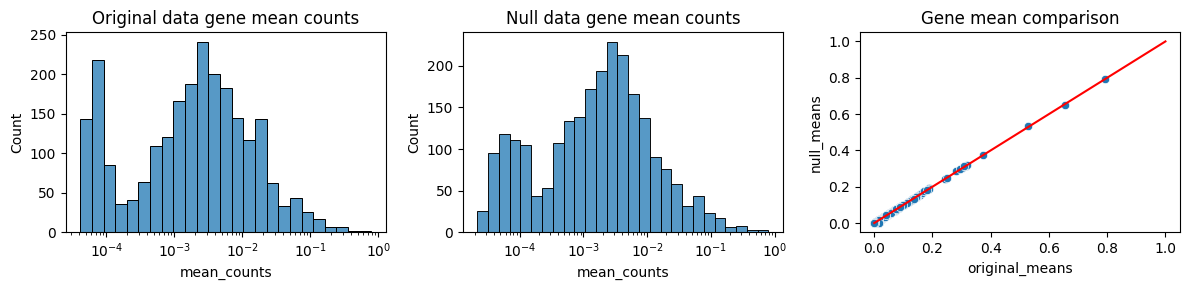

SignificanceResult(statistic=0.9184110060696883, pvalue=0.0)


In [79]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="mean_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene mean counts")
sns.histplot(data_null_gen.var, x="mean_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene mean counts")

mean_df_opt = pd.DataFrame({"original_means": data_gene_nonzero.var["mean_counts"], "null_means": data_null_gen.var["mean_counts"]})
sns.scatterplot(mean_df_opt, y="null_means", x="original_means", ax=ax[2])
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], color="red")
ax[2].set_title("Gene mean comparison")
plt.tight_layout()
plt.show()

print(spearmanr(mean_df_opt["original_means"], mean_df_opt["null_means"]))

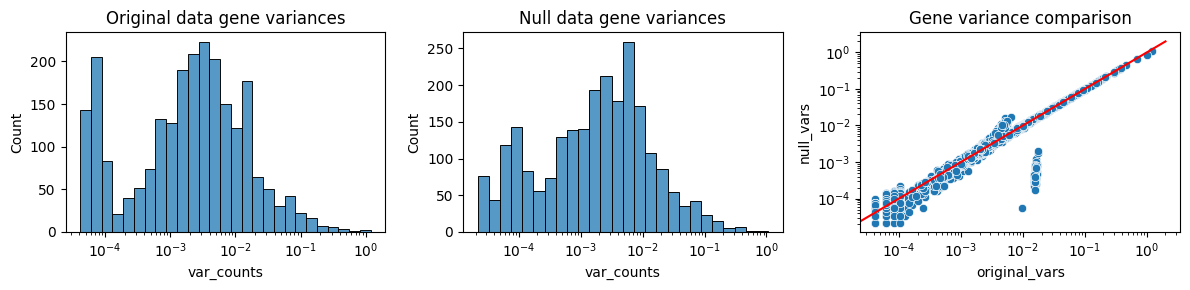

SignificanceResult(statistic=0.9153544238350797, pvalue=0.0)
[[1.         0.99619386]
 [0.99619386 1.        ]]


In [80]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="var_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene variances")
sns.histplot(data_null_gen.var, x="var_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene variances")

var_df_opt = pd.DataFrame({"original_vars": data_gene_nonzero.var["var_counts"], "null_vars": data_null_gen.var["var_counts"]})
var_df_opt["ratio"] = var_df_opt["null_vars"] / var_df_opt["original_vars"]
var_df_opt["diff"] = var_df_opt["null_vars"] - var_df_opt["original_vars"]

g = sns.scatterplot(var_df_opt, y="null_vars", x="original_vars", ax=ax[2])

g.set(xscale="log", yscale="log")
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], color="red")
ax[2].set_title("Gene variance comparison")
plt.tight_layout()
plt.show()

print(spearmanr(var_df_opt["original_vars"], var_df_opt["null_vars"]))
print(np.corrcoef(var_df_opt["original_vars"], var_df_opt["null_vars"]))

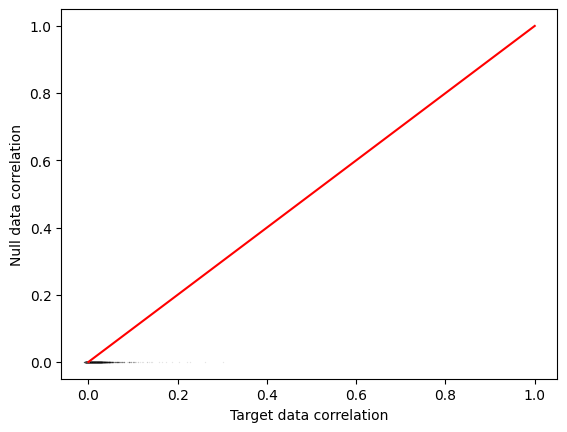

In [81]:
cor_shrink = cd.schaefer_strimmer(data_gene_nonzero.layers["counts"].toarray(), use_corr=True)
cor_shrink = pd.DataFrame(cor_shrink, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

cor_gen_shrink = cd.schaefer_strimmer(data_null_gen.X, use_corr=True)
cor_gen_shrink = pd.DataFrame(cor_gen_shrink, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

# Plot only 100.000 randomly sampled correlations instaed of ~30M
rng = np.random.default_rng(1234)
all_cors = pd.DataFrame({"cor_shrink": cor_shrink.values.flatten(), "cor_gen_shrink": cor_gen_shrink.values.flatten()})

ids = rng.choice(len(all_cors), 100000, replace=False)
all_cors_subset = all_cors.loc[ids]

sns.scatterplot(all_cors_subset[all_cors_subset['cor_shrink'] < 0.99], x="cor_shrink", y="cor_gen_shrink", s=1,
                color="black", alpha=0.1)
plt.plot([0, np.ceil(np.max(all_cors_subset['cor_shrink']))], [0, np.ceil(np.max(all_cors_subset['cor_shrink']))],
         color="red")
plt.xlabel("Target data correlation")
plt.ylabel("Null data correlation")

plt.show()

### Process null data

In [82]:
sc.pp.calculate_qc_metrics(data_null_gen)
data_null_gen.var["var_counts"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [83]:
importlib.reload(nb)
nb.estimate_overdisp_nb(data_null_gen, flavor="sctransform", seed=1234)
data_null_gen.layers["counts"] = data_null_gen.X.copy()

k_opt = data_gene.uns["BacSC_params"]["k_opt"]
n_neighbors_opt = data_gene.uns["BacSC_params"]["n_neighbors_opt"]
min_dist_opt = data_gene.uns["BacSC_params"]["min_dist_opt"]
res_opt = data_gene.uns["BacSC_params"]["res_opt"]
print(n_neighbors_opt)

sc.pp.calculate_qc_metrics(data_null_gen, var_type="genes", percent_top=None, log1p=True, inplace=True)
sc.pp.normalize_total(data_null_gen, target_sum=None, layer=None)
data_null_gen.X = sps.csr_matrix(np.log(data_null_gen.X + np.array(data_null_gen.var["nb_overdisp"] / 4)))
data_null_gen.layers["vst_counts"] = data_null_gen.X.copy()
sc.pp.scale(data_null_gen, max_value=10, zero_center=True)
data_null_gen.X[np.isnan(data_null_gen.X)] = 0
sc.tl.pca(data_null_gen, svd_solver='arpack')
sc.pp.neighbors(data_null_gen, n_neighbors=n_neighbors_opt, n_pcs=k_opt)
sc.tl.umap(data_null_gen, neighbors_key="neighbors", min_dist=min_dist_opt, spread=1)


70


In [ ]:
sc.pl.umap(data_null_gen, color="total_counts", alpha=1, cmap="viridis", title="Null data")
plt.show()


In [85]:
data_null_gen.var["is_scd_outlier"] = [str(x) for x in data_null_gen.var["is_scd_outlier"]]
data_null_gen.write(data_path + "/null_data_untreated_01.h5ad")

In [86]:
data_null_gen = sc.read_h5ad(data_path + "/null_data_untreated_01.h5ad")
data_gene_nonzero = data_gene_01[:, data_null_gen.var_names].copy()

In [87]:
n_splits = 1
rng = np.random.default_rng(1234)
seeds = rng.choice(1000, n_splits)
null_pvals_dict = {}
min_pvals_null = []
c = 0
res_start = 0.01
res_step = 0.01

for s in seeds:
    res2 = res_start
    twoclust = False
    was_greater = False
    max_res_1_cluster = 0.01
    
    while twoclust is False:
        sc.tl.leiden(data_null_gen, resolution=res2, key_added=f"leiden_{c}", random_state=s)
        nclust = len(data_null_gen.obs[f"leiden_{c}"].unique())
        print(f"resolution: {res2}, clusters: {nclust}")

        if nclust == 2:
            twoclust = True
            break
        elif nclust < 2:
            if res2 > max_res_1_cluster:
                max_res_1_cluster = res2
            else: 
                res_step = res_step/2
            if was_greater:
                res2 += res_step
            else:
                res2 += 5*res_step
        else:
            was_greater = True
            min_res_2plus_clusters = res2
            res2 -= res_step
        res2 = np.round(res2, 15)

            
    X_null_gen_0 = data_null_gen.X[data_null_gen.obs[f"leiden_{c}"] == "0"]
    X_null_gen_1 = data_null_gen.X[data_null_gen.obs[f"leiden_{c}"] != "0"]
    null_pvals = ranksums(X_null_gen_0, X_null_gen_1, alternative="two-sided").pvalue
    null_pvals_dict[c] = null_pvals

    clusters = data_gene.obs["leiden_opt"].unique()
            
    min_pvals_null.append(np.min(null_pvals))
            
    print(f"split {c+1}/{n_splits} - Resolution {res2}")

    res_start = res2 - 5*res_step
    c += 1
    
best_split = np.where(min_pvals_null == np.max(min_pvals_null))[0][0]
print(f"Best split: No. {best_split} - seed: {seeds[best_split]} - minimal p-value: {min_pvals_null[best_split]}")

resolution: 0.01, clusters: 1
resolution: 0.035, clusters: 1
resolution: 0.06, clusters: 2
split 1/1 - Resolution 0.06
Best split: No. 0 - seed: 979 - minimal p-value: 7.662163502949027e-132


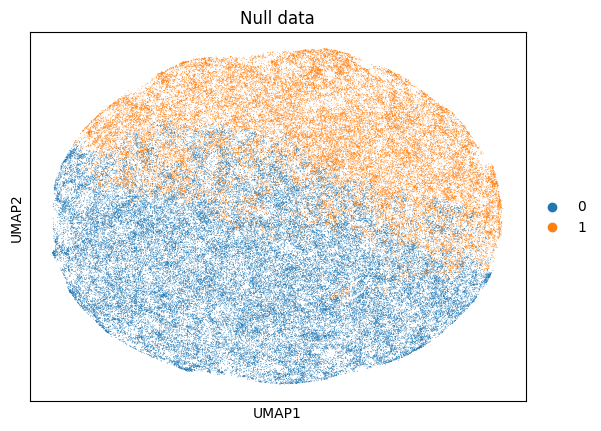

In [88]:
sc.pl.umap(data_null_gen, color=f"leiden_{best_split}", alpha=1, cmap="viridis", title="Null data")
plt.show()

In [89]:
data_null_gen.obs["leiden_best"] = data_null_gen.obs[f"leiden_{best_split}"]

data_null_gen.write(data_path + "/null_data_untreated_01.h5ad")

In [90]:
importlib.reload(cd)
clusters = data_gene.obs["leiden_opt"].unique()
DEs_log_gen = {}
pvals_log_gen = {}
fdr = 0.05
rng = np.random.default_rng(1234)

for c in clusters:
    
    X_data_0 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] == c].copy()
    X_data_1 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] != c].copy()
    
    n_cells_0 = X_data_0.shape[0]
    n_cells_1 = X_data_1.shape[0]
    
    X_null_gen_0 = data_null_gen.X[data_null_gen.obs[f"leiden_best"] != "0"]
    X_null_gen_0 = X_null_gen_0[rng.integers(X_null_gen_0.shape[0], size=n_cells_0),:]
    X_null_gen_1 = data_null_gen.X[data_null_gen.obs[f"leiden_best"] == "0"]
    X_null_gen_1 = X_null_gen_1[rng.integers(X_null_gen_1.shape[0], size=n_cells_1),:]
    null_pvals = ranksums(X_null_gen_0, X_null_gen_1, alternative="two-sided", nan_policy="omit").pvalue
    
    pvals_data = ranksums(X_data_0, X_data_1, alternative="two-sided", nan_policy="omit").pvalue
    p_data = pd.DataFrame({"pval_data": pvals_data}, index=data_gene_nonzero.var.index)
    pval_null_gen = pd.DataFrame({"pval_null": null_pvals}, index=data_null_gen.var.index)
    
    DE_TU, pval_TU = cd.call_de(p_data, pval_null_gen, FDR=fdr, correct=False, nlog=True)
    data_gene_nonzero.var[f"pval_cluster_{c}_gen"] = pval_TU["pval_data"]
    data_gene_nonzero.var[f"q_cluster_{c}_gen"] = pval_TU["q"]
    data_gene_nonzero.var[f"DE_cluster_{c}_gen"] = (data_gene_nonzero.var[f"q_cluster_{c}_gen"] < fdr)
    
    DEs_log_gen[c] = DE_TU
    pvals_log_gen[c] = pval_TU
    print(f"Cluster {c} - DE genes: {len(DEs_log_gen[c])}; Minimum q value: {np.min(pvals_log_gen[c]['q'])}")

Cluster 0 - DE genes: 0; Minimum q value: 0.6940559440559441
Cluster 1 - DE genes: 0; Minimum q value: 1
Cluster 2 - DE genes: 0; Minimum q value: 0.7406593406593407


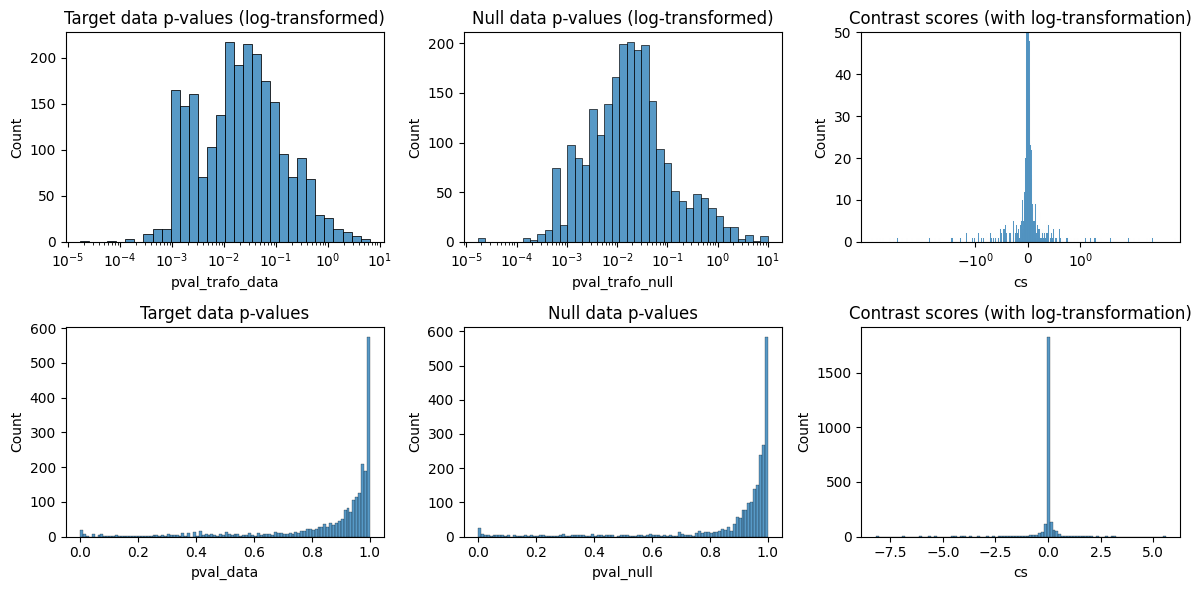

In [91]:
c = "2"

fig, ax = plt.subplots(2, 3, figsize=(12,6))
sns.histplot(pvals_log_gen[c], x="pval_trafo_data", ax=ax[0,0], log_scale=True)
ax[0,0].set_title("Target data p-values (log-transformed)")
sns.histplot(pvals_log_gen[c], x="pval_trafo_null", ax=ax[0,1], log_scale=True)
ax[0,1].set_title("Null data p-values (log-transformed)")

sns.histplot(pvals_log_gen[c], x="cs", ax=ax[0,2])
ax[0,2].set_title("Contrast scores (with log-transformation)")
ax[0,2].set(xscale="symlog", ylim=(0, 50))

sns.histplot(pvals_log_gen[c], x="pval_data", ax=ax[1,0], bins=100)
ax[1,0].set_title("Target data p-values")
sns.histplot(pvals_log_gen[c], x="pval_null", ax=ax[1,1], bins=100)
ax[1,1].set_title("Null data p-values")

sns.histplot(pvals_log_gen[c], x="cs", ax=ax[1,2], bins=100)
ax[1,2].set_title("Contrast scores (with log-transformation)")


plt.tight_layout()
plt.show()

In [92]:
for c in clusters:
    print(f"cluster {c}")
    print(pvals_log_gen[c]["q"].value_counts().sort_index())
    print("")

cluster 0
0.694056     572
0.696335       1
0.698517      34
0.700159      20
0.700475       4
            ... 
0.805511       3
0.805825       2
0.807425      57
0.807722       2
1.000000    1101
Name: q, Length: 87, dtype: int64

cluster 1
1    2396
Name: q, dtype: int64

cluster 2
0.740659     455
0.741228       1
0.741794       1
0.742358       1
0.743478       2
            ... 
0.871498       1
0.873552       1
0.873917       3
0.875907     202
1.000000    1155
Name: q, Length: 88, dtype: int64



In [93]:
pvals_log_gen["2"]

,pval_data,pval_null,pval_trafo_data,pval_trafo_null,cs,q
cds-WP_002919759.1,0.000003,9.935443e-01,5.581312,0.002813,5.578499,0.740659
cds-WP_012068464.1,0.000365,5.920526e-01,3.438265,0.227640,3.210626,0.740659
cds-WP_002919796.1,0.000046,6.405475e-02,4.341896,1.193449,3.148448,0.740659
cds-WP_002888731.1,0.000631,6.181907e-01,3.200141,0.208878,2.991264,0.740659
cds-WP_013815099.1-31,0.001485,9.777583e-01,2.828391,0.009768,2.818622,0.740659
...,...,...,...,...,...,...
cds-WP_002920103.1,0.000342,1.676981e-09,3.465719,8.775472,-5.309753,1.000000
cds-WP_002919515.1,0.000061,1.528979e-10,4.215015,9.815599,-5.600583,1.000000
cds-WP_004174069.1-2,0.207476,1.769692e-07,0.683031,6.752102,-6.069071,1.000000
cds-WP_001181005.1,0.533547,6.408281e-08,0.272827,7.193258,-6.920431,1.000000


In [94]:
data_gene_nonzero.uns["ClusterDE_results"] = pvals_log_gen

data_gene_nonzero.uns["ClusterDE_results"]['params'] = {'groupby': 'leiden_opt',
  'reference': 'rest',
  'use_raw': False,
  'layer': None,
}

In [95]:
data_gene_nonzero.write(data_path + "/untreated_data_processed_cluster_01.h5ad")

In [99]:
for c in [clusters]:
    plot_genes = data_gene_nonzero.uns["ClusterDE_results"][c].iloc[:10,:].index.tolist()
    data_gene_nonzero.obs["is_c"] = pd.Categorical([x==c for x in data_gene_nonzero.obs["leiden_opt"]])
    with plt.rc_context({"figure.figsize": (5, 5)}):
        sc.pl.violin(data_gene_nonzero, keys=plot_genes, groupby="is_c", multi_panel=True)

TypeError: unhashable type: 'Categorical'

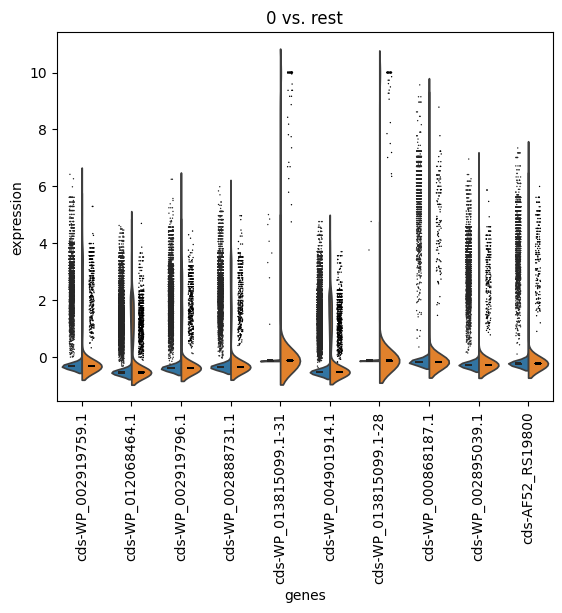

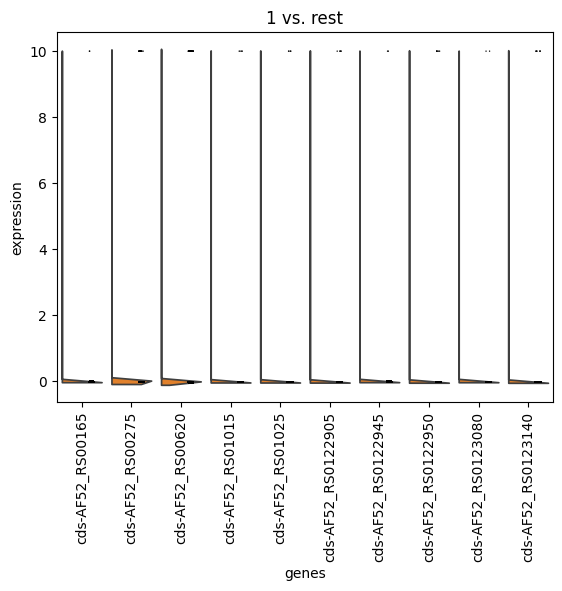

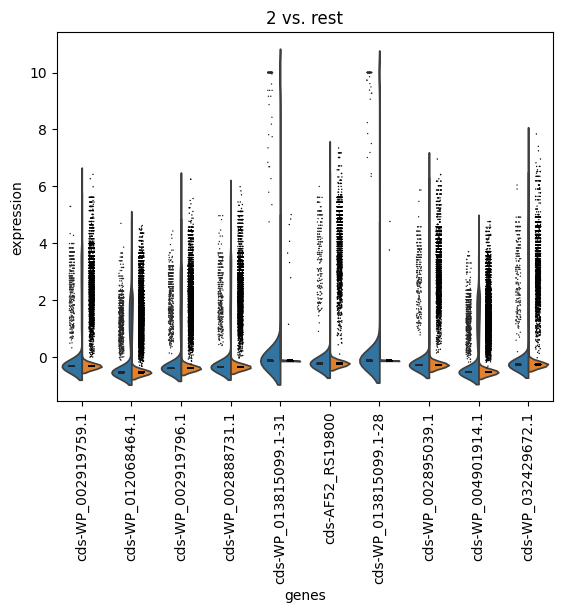

In [100]:
n_genes = 10
for c in clusters:
    plot_genes = data_gene_nonzero.uns["ClusterDE_results"][c].iloc[:n_genes,:].index.tolist()
    sc.pl.rank_genes_groups_violin(data_gene_nonzero, gene_names=plot_genes, key="ClusterDE_results", groups=c)

In [101]:
all_marker_genes = []
for c in clusters:
    plot_genes = data_gene_nonzero.uns["ClusterDE_results"][c].iloc[:n_genes,:].index.tolist()
    all_marker_genes += plot_genes
    print(f"Cluster {c}")
    print(data_gene_01.var.loc[plot_genes, ["locus_tag", "name", "symbol"]])

Cluster 0
                          locus_tag  \
cds-WP_002919759.1     AF52_RS08415   
cds-WP_012068464.1     AF52_RS12625   
cds-WP_002919796.1     AF52_RS08450   
cds-WP_002888731.1     AF52_RS06255   
cds-WP_013815099.1-31  AF52_RS22855   
cds-WP_004901914.1     AF52_RS04675   
cds-WP_013815099.1-28  AF52_RS22855   
cds-WP_000868187.1     AF52_RS25830   
cds-WP_002895039.1     AF52_RS12615   
cds-AF52_RS19800       AF52_RS19800   

                                                                 name symbol  
cds-WP_002919759.1                          50S ribosomal protein L16   rplP  
cds-WP_012068464.1          2-oxoglutarate dehydrogenase E1 component   sucA  
cds-WP_002919796.1                           50S ribosomal protein L3   rplC  
cds-WP_002888731.1                        dihydrolipoyl dehydrogenase   lpdA  
cds-WP_013815099.1-31      IS5-like element IS903B family transposase    NaN  
cds-WP_004901914.1           DNA-directed RNA polymerase subunit beta   rpoB  
cds-WP_

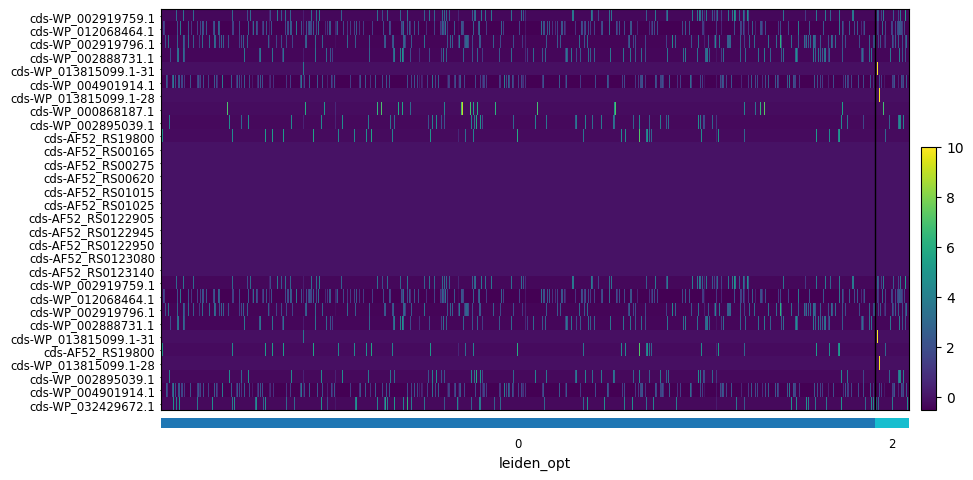

In [102]:
sc.pl.heatmap(data_gene_nonzero, all_marker_genes, groupby='leiden_opt', swap_axes=True)